# Practica 2

## Integrantes

* Garcia Saavedra Armando
* Mejia Yañez Jose Ehecatl
* Rodriguez Nuñez Diego Eduardo

***
## Introducción

El Merge Sort recursivo es un algoritmo de ordenamiento que divide una lista en dos mitades, las ordena recursivamente y luego combina las mitades ordenadas en una sola lista ordenada.

El proceso se lleva a cabo en tres etapas:

1. Dividir la lista original en dos mitades: Se divide la lista original en dos partes iguales hasta que quede un solo elemento en cada mitad.

2. Ordenar las mitades recursivamente: Se ordena cada una de las mitades de manera recursiva, dividiendo cada una en dos mitades más pequeñas hasta que queden ordenadas.

3. Combinar las mitades ordenadas: Se combinan las dos mitades ordenadas en una sola lista ordenada. Este proceso implica comparar los elementos de ambas listas, eligiendo el más pequeño y agregándolo a la lista combinada. Este proceso se repite hasta que se hayan agregado todos los elementos de ambas mitades.

El Merge Sort es un algoritmo muy eficiente, ya que tiene una complejidad de tiempo de O(n log n) para el peor caso y también es estable, lo que significa que mantiene el orden relativo de los elementos iguales.

El Quicksort recursivo es un algoritmo de ordenamiento que utiliza la estrategia de divide y vencerás para ordenar una lista de elementos. El algoritmo selecciona un elemento de la lista, llamado "pivote", y divide la lista en dos partes: una parte con elementos menores o iguales que el pivote y otra con elementos mayores que el pivote. Luego, se ordenan de manera recursiva las dos partes de la lista.

El proceso se lleva a cabo en tres etapas:

1. Selección del pivote: Se selecciona un elemento de la lista, generalmente el primer elemento, como pivote.

2. Partición de la lista: Se divide la lista en dos partes, una con elementos menores o iguales al pivote y otra con elementos mayores que el pivote. Para esto se compara cada elemento de la lista con el pivote y se los ubica en la lista correspondiente.

3. Ordenación recursiva: Se ordenan de manera recursiva las dos partes de la lista, utilizando el mismo proceso de selección de pivote y partición. El proceso se repite hasta que la lista esté completamente ordenada.

El Quicksort es un algoritmo muy eficiente, con una complejidad de tiempo de O(n log n) en el caso promedio, aunque en el peor caso puede tener una complejidad de O(n^2). La elección del pivote es un factor crítico en el rendimiento del algoritmo. Por lo tanto, existen varias estrategias para seleccionar el pivote, como elegir el elemento central de la lista o seleccionar un elemento aleatorio.

***
## Metodología

La recursividad es una característica fundamental de estos algoritmos, ya que permite resolver problemas complejos dividiéndolos en subproblemas más pequeños y más simples. Además, en ambos algoritmos, la recursividad se aplica de forma eficiente para lograr una complejidad de tiempo óptima para el problema de ordenación.

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import timeit

In [4]:
def merge(arr_i,arr_d):
    i=j=k=0
    arreglo = np.zeros(len(arr_i)+len(arr_d))
    while i < len(arr_i) and j < len(arr_d):
        if arr_i[i] < arr_d[j]:
            arreglo[k] = arr_i[i]
            i += 1
        else:
            arreglo[k] = arr_d[j]
            j += 1
        k += 1

    while i < len(arr_i):
        arreglo[k] = arr_i[i]
        i += 1
        k += 1

    while j < len(arr_d):
        arreglo[k] = arr_d[j]
        j += 1
        k += 1
    return arreglo

In [5]:
def sort(arr):
    if len(arr) <= 1:
        return arr
    
    mid= len(arr) // 2
    arr_i = sort(arr[:mid])
    arr_d = sort(arr[mid:])

    return merge(arr_i,arr_d)

In [6]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivote = arr[0]
        mayor = []
        menor = []
        for i in range(1,len(arr)):
            if arr[i] < pivote:
                menor.append(arr[i])
            else:
                mayor.append(arr[i])
        return quicksort(menor)+[pivote]+quicksort(mayor)

In [7]:
tams = [10,100,1000,10000,1000000,10000000]

In [8]:
mergesort_tiempos = []
quicksort_tiempos = []
numpysort_tiempos = []

In [9]:
for tam in tams:
    arr = np.random.randint(0,100000,tam)
    mergesort_tiempo = timeit.timeit('sort(arr)', number = 1, globals=globals())
    quicksort_tiempo = timeit.timeit('quicksort(arr)', number = 1, globals=globals())
    mergesort_tiempos.append(mergesort_tiempo)
    quicksort_tiempos.append(quicksort_tiempo)

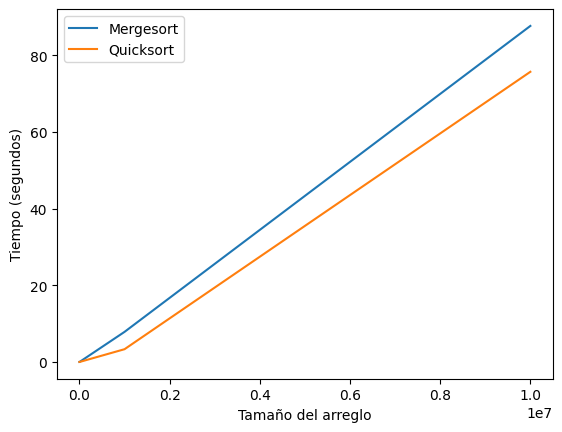

In [10]:
plt.plot(tams,mergesort_tiempos,label='Mergesort')
plt.plot(tams,quicksort_tiempos,label='Quicksort')
plt.xlabel("Tamaño del arreglo")
plt.ylabel("Tiempo (segundos)")
plt.legend()
plt.show()

In [11]:
mergesort_tiempos

[4.0800077840685844e-05,
 0.0003090000245720148,
 0.004620100022293627,
 0.053094099974259734,
 7.8443609001114964,
 87.69695100001991]

In [12]:
quicksort_tiempos

[1.2899981811642647e-05,
 9.839993435889482e-05,
 0.0011143999872729182,
 0.0149478999665007,
 3.3193446000805125,
 75.72504529997241]

In [13]:
import pandas as pd

In [14]:
data = {
    'Tiempos Mergesort': mergesort_tiempos,
    'Tiempos Quicksort': quicksort_tiempos,
    'Tamaños de los arreglos': tams
}

df= pd.DataFrame(data)
df.set_index('Tamaños de los arreglos',inplace=True)
df

,Tiempos Mergesort,Tiempos Quicksort
Tamaños de los arreglos,,
10,0.000041,0.000013
100,0.000309,0.000098
1000,0.004620,0.001114
10000,0.053094,0.014948
1000000,7.844361,3.319345
10000000,87.696951,75.725045


***
# Conclusión

Dados los resultados y calculando su complejidad temporal de los algoritmos, podemos concluir que son radicalmente mas eficientes que los metodos directos de ordenamiento, esto debido a que se compara una complejidad de O(nlogn) contra O(n^2).

Por otra parte , en su complejidad espacial, el algoritmo merge sort, debe disponer de mayor espacio que los algoritmos convencionales, contrastando O(nlogn) y O(n), sin embargo, el algoritmo quick sort O(n), no posee dicho problema.

Es asi como los ya mencionados algoritmos son en cualquiera de los casos mas eficientes que los metodos directos

***
# Caracteristicas del Equipo

Procesador: 11th Gen Intel(R) Core(TM) i5-11400H @ 2.70GHz   2.69 GHz

RAM instalada: 32 GB (31.7 Utilizable)

Sistema Operativo: Windows 11, Sistema operativo de 64 bits, procesador x64